# Solve poisson equation

## <center>주어진 식</center>

## <center> $\triangledown \cdot (\epsilon_{0}\epsilon_{r}\vec{E}) = -\triangledown \cdot(\epsilon_{o}\epsilon_{r}\triangledown V) = \rho$</center>


<center>각 항의 의미</center>
<center> $\vec{E}$ : 전기장 </center>
    <center>    $V$ : 전위 </center>       
<center> $\epsilon$: 유전율(상수로 가정)</center>
       
<center>$\rho$ : 전하밀도(상수로 가정)
       </center>

에너지 벡터를 전압의 그래디언트로 나타낼 수 있다. 따라서 우측의 두 항을 사용한다.

양 변의 우측에 test function $\nu$를 곱해준다.

## <center>$-\triangledown \cdot(\epsilon_{o}\epsilon_{r}\triangledown V)\nu = \rho \nu$</center>

범위 $\Omega$에서 양변을 적분한다.

## <center>$-\int_{\Omega}\triangledown \cdot(\epsilon_{o}\epsilon_{r}\triangledown V)\nu dx= \int_{\Omega} \rho \nu dx$</center>

다음과 같이 식을 정리할 수 있다.

## <center>$-\int_{\Omega}\triangledown \cdot(\epsilon_{o}\epsilon_{r}\triangledown V)\nu dx=\int_{\Omega}\triangledown^{2} \cdot(\epsilon_{o}\epsilon_{r}V)\nu dx = \int_{\Omega}\triangledown (\epsilon_{o}\epsilon_{r} V)\cdot\triangledown\nu dx - \int_{\partial\Omega} \frac{\partial \epsilon_{o}\epsilon_{r} V }{\partial n}\nu ds$</center>

경계 조건을 0으로 두어 $- \int_{\partial\Omega} \frac{\partial \epsilon_{o}\epsilon_{r} V }{\partial n}\nu ds=0$ 으로 취급한다.

## <center>$\int_{\Omega}\triangledown (\epsilon_{o}\epsilon_{r} V)\cdot\triangledown\nu dx - \int_{\partial\Omega} \frac{\partial \epsilon_{o}\epsilon_{r} V }{\partial n}\nu ds =\int_{\Omega} \rho \nu dx $</center>

따라서 다음과 같이 식을 정리할 수 있다.

## <center>$\int_{\Omega}\triangledown (\epsilon_{o}\epsilon_{r} V)\cdot\triangledown\nu dx  =\int_{\Omega} \rho \nu dx $</center>

## <center> $a=\int_{\Omega}\triangledown (\epsilon_{o}\epsilon_{r} V)\cdot\triangledown\nu dx$</center>

## <center> $L = \int_{\Omega} \rho \nu dx $</center>

### <center>적용 상수<center>
    
    
<center>$\epsilon = 1$</center>
<center>$\rho= 0.5$</center>
<center>$관의 반경 = 3mm$</center>
<center>$전극의 반경 = 1.5mm$</center>


### <center>경계조건</center>

<center> r = 1.5 mm 에서 V= 15KV</center>
<center> r = 3.0 mm 에서 V = 0 </center>


### <center> 예상 결과 </center>
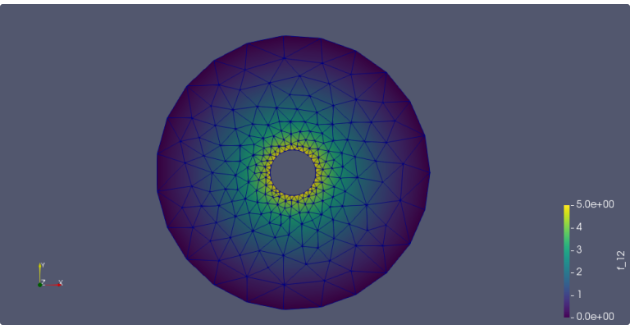

정리한 식을 바탕으로 구현한 코드는 다음과 같다.

In [1]:
from fenics import *
from dolfin import *
from mshr import *

In [2]:
# create Mesh
domain1 = Circle(Point(0, 0), 1.5)
domain2 = Circle(Point(0, 0), 3)
domain = domain2 - domain1
mesh = generate_mesh(domain, 50)
epsilon_0 = 1
epsilon_e = 1
X = FunctionSpace(mesh, 'P', 1)

In [3]:
r = Expression("sqrt(x[0]*x[0]+x[1]*x[1])", degree=1)
theta = Expression("atan2(x[1],x[0])", degree=1)
tol = 1E-3
def outer_boundary(x, on_boundary):
    return on_boundary and sqrt(x[0]*x[0]+x[1]*x[1]) > 3-tol

def inner_boundary(x, on_boundary):
    return on_boundary and (sqrt(x[0]*x[0]+x[1]*x[1])<1.5 + tol)

bc = [DirichletBC(X, Expression("0",r=r,t=theta, degree=2), outer_boundary),
       DirichletBC(X, Expression("15",r=r,t=theta, degree=2), inner_boundary)]

In [4]:
# Define variational proble
V = TrialFunction(X)
v = TestFunction(X)
rho = Constant(0.5)
a = dot(grad(epsilon_0*epsilon_e*V), grad(v))*dx
L = rho*v*dx

In [5]:
# Compute solution
V = Function(X)
solve(a == L, V, bc)

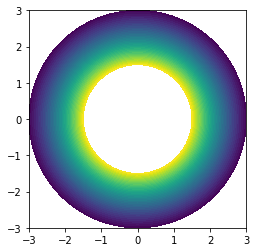

In [7]:
plot(V)

예상했던 결과와 비슷한 형상의 결과를 얻었다. Z값의 확인을 위해 결과값을 저장한다.

In [8]:
vtkfile_V = File('poisson/voltage.pvd')
vtkfile_V << V

 파라뷰를 통해 결과를 확인하였다.

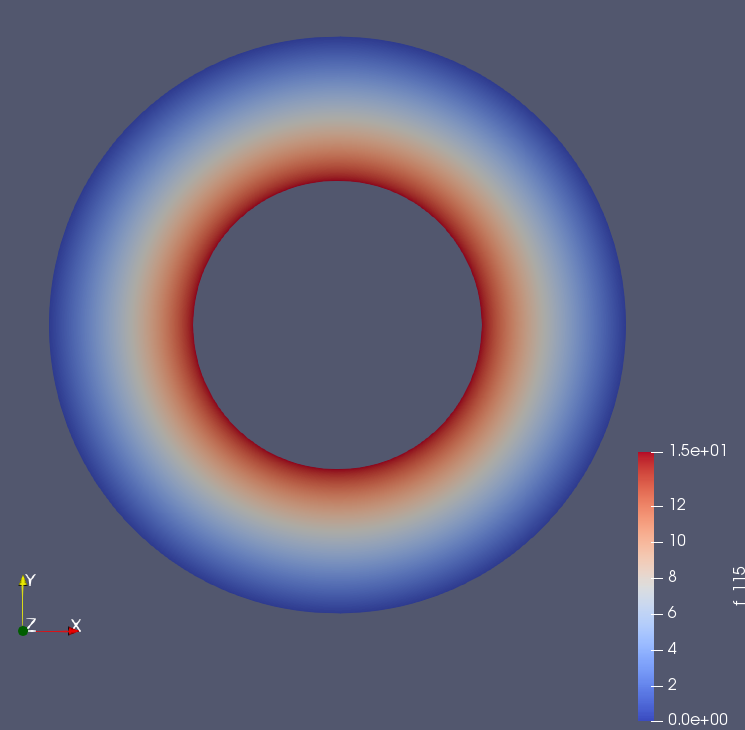

반경 1.5mm 의 전극 표면 부근에서의 값이 15인 것을 확인하였고, 반경 3mm 반응기 끝부분에서의 전극은 0임을 확인하였다.

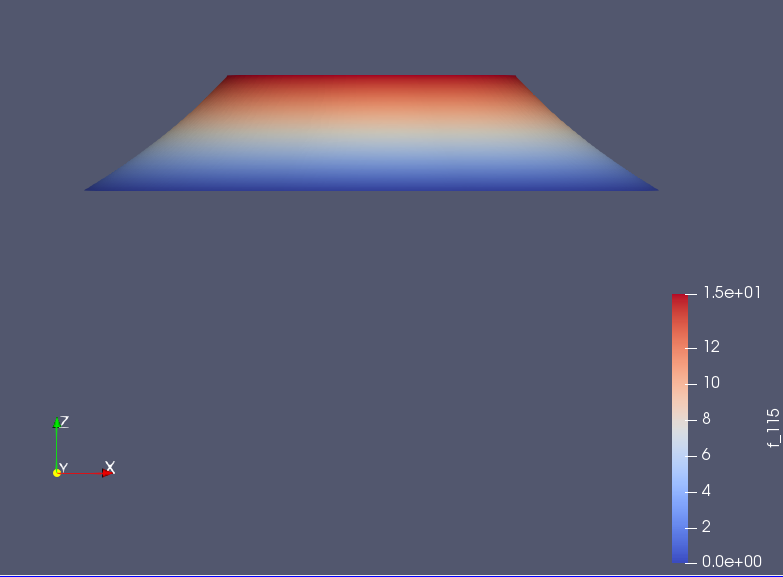

0.08배율로 Z값에 높이를 준 결과이다. 매우 급격하게 전류가 떨어지는 것을 확인할 수 있다.